In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from datetime import datetime
from matplotlib.ticker import FixedLocator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import csv


plt.rcParams['font.family'] = 'MS Gothic' #凡例やラベルに日本語を使っても文字化けしないようにする
current_date = datetime.now().strftime("%Y%m%d")

In [3]:
measurement_kind = input("マッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")  

マッキベンの種類を入力してください(4s or 4l or 6 or s or u):  6


In [6]:
count = input("測定回数を入力してください(例:1): ")  

測定回数を入力してください(例:1):  5


In [5]:
pressure1 = input("データ1の圧力を入力してください: ")
pressure2 = input("データ2の圧力を入力してください: ")
pressure3 = input("データ3の圧力を入力してください: ")
pressure4 = input("データ4の圧力を入力してください: ")
pressure5 = input("データ5の圧力を入力してください: ")

データ1の圧力を入力してください:  4
データ2の圧力を入力してください:  5
データ3の圧力を入力してください:  6
データ4の圧力を入力してください:  7
データ5の圧力を入力してください:  8


In [4]:
date = input("データの日付を入力してください: ")

データの日付を入力してください:  20231124


Estimated Parameters (extension):
c3_e: -66.19943557148548
c2_e: 0.19794262541106397
c1_e: -4.370236989533283e-05
c0_e: 215.3097231312066
Estimated Parameters (contraction):
c3_c: -64.30467526310184
c2_c: 0.21257168829063267
c1_c: -3.955530197091671e-05
c0_c: 214.09713022036738


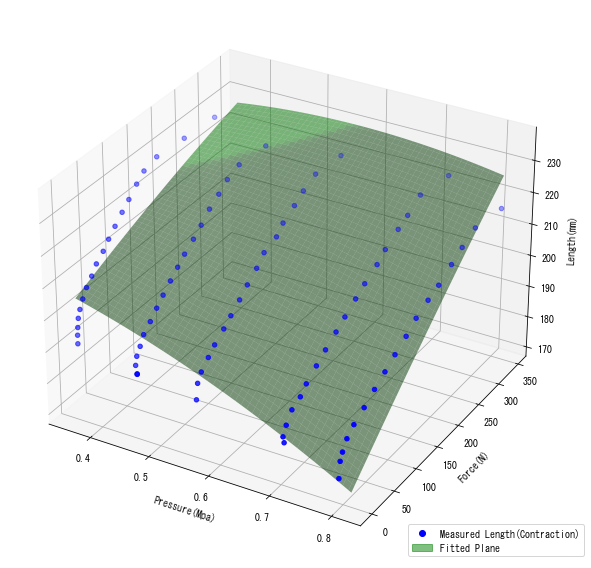

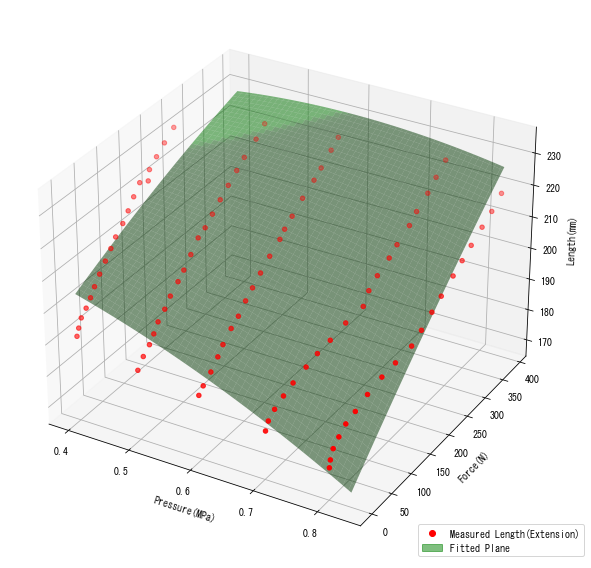

In [12]:
pressure_with_decimal1 = f"0.{pressure1}" 
pressure_with_decimal2 = f"0.{pressure2}" 
pressure_with_decimal3 = f"0.{pressure3}" 
pressure_with_decimal4 = f"0.{pressure4}" 
pressure_with_decimal5 = f"0.{pressure5}" 

dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_ese.csv")
dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_ese.csv")
dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_ese.csv")
dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_ese.csv")
dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_ese.csv")

#dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
#dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
#dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
#dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
#dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

column1 = dt1[["Pressure","Length","Force"]]
column2 = dt2[["Pressure","Length","Force"]]
column3 = dt3[["Pressure","Length","Force"]]
column4 = dt4[["Pressure","Length","Force"]]
column5 = dt5[["Pressure","Length","Force"]]

combined_column = pd.concat([column1,column2,column3,column4,column5])
dt_list = [column1, column2, column3, column4, column5]

for i, column in enumerate(dt_list):
    pressure_values = column["Pressure"].values
    length_values = column["Length"].values
    force_values = column["Force"].values

    # Forceが最大値を取るまでの範囲を赤でプロット
    idx_max_force = column["Force"].idxmax()
    ax.plot(pressure_values[:idx_max_force + 1], length_values[:idx_max_force + 1], force_values[:idx_max_force + 1], c='r', marker='o', markersize=2)

    # Forceが最大値を取った後の範囲を青でプロット
    ax.plot(pressure_values[idx_max_force + 1:], length_values[idx_max_force + 1:], force_values[idx_max_force + 1:], c='b', marker='o', markersize=2)

ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')
       


# 最大値取得前のデータをまとめる
before_max_force_data = pd.concat([dt1.iloc[:idx_max_force + 1, :], dt2.iloc[:idx_max_force + 1, :], dt3.iloc[:idx_max_force + 1, :], dt4.iloc[:idx_max_force + 1, :], dt5.iloc[:idx_max_force + 1, :]])

# 最大値取得後のデータをまとめる
after_max_force_data = pd.concat([dt1.iloc[idx_max_force + 1:, :], dt2.iloc[idx_max_force + 1:, :], dt3.iloc[idx_max_force + 1:, :], dt4.iloc[idx_max_force + 1:, :], dt5.iloc[idx_max_force + 1:, :]])

pressure_values_c = after_max_force_data["Pressure"].values
length_values_c = after_max_force_data["Length"].values
force_values_c = after_max_force_data["Force"].values
length_values_cl = after_max_force_data["Real Stretched Length"].values

pressure_values_e = before_max_force_data["Pressure"].values
length_values_e = before_max_force_data["Length"].values
force_values_e = before_max_force_data["Force"].values
length_values_el = before_max_force_data["Real Stretched Length"].values


# 関数の定義
def calculate_F(data, c3, c2, c1, c0):
    P, L = data
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    F = K * L
    return F


def calculate_L(data, c3, c2, c1, c0):
    P, F = data
    L =  c3* P**2 + c2 * P * F + c1 * F**2 + c0
    return L


# パラメータの初期値
initial_guess = [1.0, 1.0, 1.0, 1.0]

# 最小二乗法によるフィッティング
params_e, covariance_e = curve_fit(calculate_L, (pressure_values_e, force_values_e),length_values_el, p0=initial_guess)
params_c, covariance_c = curve_fit(calculate_L, (pressure_values_c,force_values_c), length_values_cl, p0=initial_guess)

# 推定されたパラメータ

c3_e, c2_e, c1_e, c0_e = params_e
c3_c, c2_c, c1_c, c0_c = params_c

print(f"Estimated Parameters (extension):")
print(f"c3_e: {c3_e}")
print(f"c2_e: {c2_e}")
print(f"c1_e: {c1_e}")
print(f"c0_e: {c0_e}")

print(f"Estimated Parameters (contraction):")
print(f"c3_c: {c3_c}")
print(f"c2_c: {c2_c}")
print(f"c1_c: {c1_c}")
print(f"c0_c: {c0_c}")


# 3D散布図
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pressure_values_c,  force_values_c, length_values_cl,c='b', marker='o', label='Measured Length')

# フィッティングした平面
P_plane, F_plane = np.meshgrid(np.linspace(min(pressure_values_c), max(pressure_values_c), 100),np.linspace(min(force_values_c), max(force_values_c), 100))
L_plane = calculate_L((P_plane, F_plane), c3_c, c2_c, c1_c, c0_c)
# Z軸の値が0以上の範囲のみ表示
F_plane[F_plane < 0] = np.nan
plane = ax.plot_surface(P_plane,F_plane,  L_plane, color='g', alpha=0.5, label='Fitted Plane')


ax.set_xlabel('Pressure(Mpa)')
ax.set_ylabel('Force(N)')
ax.set_zlabel('Length(mm)')


legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='',label='Measured Length(Contraction)'),
                   Patch(color='g', alpha=0.5, label='Fitted Plane')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))


plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\L_fit\\contraction\\L_fit_{date}_{count}_{measurement_kind}_cl.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\\F_fit\\contraction\\F_fit_{date}_{count}_{measurement_kind}_c.jpg'
plt.savefig(save_path,bbox_inches='tight')


# 3D散布図
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pressure_values_e, force_values_e,length_values_el,  c='r', marker='o', label='Measured Force')

# フィッティングした平面
P_plane, F_plane = np.meshgrid(np.linspace(min(pressure_values_e), max(pressure_values_e), 100), np.linspace(min(force_values_e), max(force_values_e), 100))
L_plane = calculate_L((P_plane, F_plane), c3_e, c2_e, c1_e, c0_e)
# Z軸の値が0以上の範囲のみ表示
F_plane[F_plane < 0] = np.nan
plane = ax.plot_surface(P_plane, F_plane, L_plane, color='g', alpha=0.5, label='Fitted Plane')

legend_elements = [Line2D([0], [0], color='r', marker='o', linestyle='',label='Measured Length(Extension)'),
                   Patch(color='g', alpha=0.5, label='Fitted Plane')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))

ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Force(N)')
ax.set_zlabel('Length(mm)')

plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\L_fit\\extension\\L_fit_{date}_{count}_{measurement_kind}_el.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\F_fit\\extension\\F_fit_{date}_{count}_{measurement_kind}_e.jpg'
plt.savefig(save_path,bbox_inches='tight')


csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_parameter_length\\L_fit_{date}_{count}_{measurement_kind}_epl.csv'

# 推定されたパラメータをCSVファイルに保存
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Parameter', 'Value']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # 全体の最小二乗法で推定されたパラメータ保存
    writer.writerow({'Parameter': 'c3_e', 'Value': c3_e})
    writer.writerow({'Parameter': 'c2_e', 'Value': c2_e})
    writer.writerow({'Parameter': 'c1_e', 'Value': c1_e})
    writer.writerow({'Parameter': 'c0_e', 'Value': c0_e})

    writer.writerow({'Parameter': 'c3_c', 'Value': c3_c})
    writer.writerow({'Parameter': 'c2_c', 'Value': c2_c})
    writer.writerow({'Parameter': 'c1_c', 'Value': c1_c})
    writer.writerow({'Parameter': 'c0_c', 'Value': c0_c})